# Day 7
batch size 256 lr 1e-3, normed weighted, rotated, cartesian, regression

### Import modules

In [1]:
%matplotlib inline
from __future__ import division
import sys
import os
os.environ['MKL_THREADING_LAYER']='GNU'
sys.path.append('../')
from Modules.Basics import *
from Modules.Class_Basics import *

/home/giles/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/giles/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using TensorFlow backend.


## Options

In [7]:
#classTrainFeatures = ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']
inputPipe, outputPipe = getPreProcPipes(normIn=True)
classModel = 'modelSwish'
varSet = "basic_rot_features"

nSplits = 10
ensembleSize = 10
ensembleMode = 'loss'

maxEpochs = 200
compileArgs = {'loss':'binary_crossentropy', 'optimizer':'adam'}
trainParams = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
modelParams = {'version':classModel, 'nIn':31, 'compileArgs':compileArgs, 'mode':'classifier'}

#print "\nTraining on", len(classTrainFeatures), "features:", [var for var in classTrainFeatures]

## Import data

In [8]:
trainData = h5py.File(dirLoc + 'train.hdf5', "r+")
valData = h5py.File(dirLoc + 'val.hdf5', "r+")

## Determine LR

2 classes found, running in binary mode


______________________________________
Training finished
Cross-validation took 1.088s 


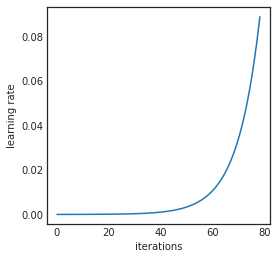

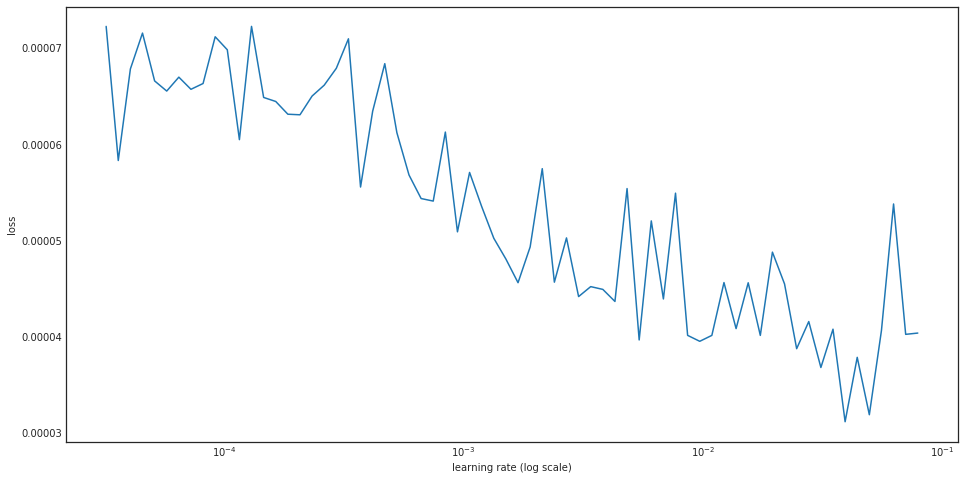

______________________________________



In [9]:
lrFinder = batchLRFind(trainData, nSplits, getModel, modelParams, trainParams, 'classifier', lrBounds=[1e-5,1e-1], trainOnWeights=True, verbose=0)

In [10]:
compileArgs['lr'] = 1e-2

## Train classifier

Using cosine annealing
Training using weights
Running fold 1 / 10
2 classes found, running in binary mode

1 New best found: 3.54268840555e-05
2 New best found: 3.45277873049e-05
3 New best found: 3.33057508559e-05
6 New best found: 3.29738727102e-05
7 New best found: 3.25969785481e-05
12 New best found: 3.23862194475e-05
13 New best found: 3.23783391987e-05
14 New best found: 3.21767076496e-05
15 New best found: 3.21612265317e-05
25 New best found: 3.21386900503e-05
26 New best found: 3.19719021859e-05
28 New best found: 3.1843010944e-05
29 New best found: 3.1792234499e-05
30 New best found: 3.16933088485e-05
31 New best found: 3.16852641255e-05
56 New best found: 3.16683341402e-05
57 New best found: 3.16167587804e-05
59 New best found: 3.15756203883e-05
60 New best found: 3.15461093704e-05
61 New best found: 3.15138806973e-05
62 New best found: 3.15118951605e-05
63 New best found: 3.15103369447e-05
Early stopping after 223 epochs
Score is: {'loss': 3.151033694474221e-05, 'AUC': 0.100

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106337). Check your callbacks.
  % delta_t_median)


1 New best found: 3.51538850423e-05
2 New best found: 3.39439574459e-05
3 New best found: 3.29394947053e-05
6 New best found: 3.26010441593e-05
7 New best found: 3.24081737799e-05
12 New best found: 3.23101060587e-05
13 New best found: 3.21348854386e-05
14 New best found: 3.19957673253e-05
15 New best found: 3.19615000768e-05
26 New best found: 3.18492152931e-05
27 New best found: 3.17611248413e-05
29 New best found: 3.15977468427e-05
30 New best found: 3.15613472086e-05
31 New best found: 3.15519915715e-05
57 New best found: 3.14532247725e-05
60 New best found: 3.14269465051e-05
61 New best found: 3.14094197396e-05
62 New best found: 3.14089072785e-05
63 New best found: 3.14077089276e-05
Early stopping after 223 epochs
Score is: {'loss': 3.140770892756951e-05, 'AUC': 0.10050288679712038, 'wAUC': 0.06194645697663348}
Fold took 266.951s

Running fold 4 / 10


/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143713). Check your callbacks.
  % delta_t_median)


1 New best found: 3.61198885278e-05
2 New best found: 3.4781742292e-05
3 New best found: 3.39371156205e-05
6 New best found: 3.3712964861e-05
7 New best found: 3.32729324271e-05
13 New best found: 3.30597456142e-05
14 New best found: 3.28298215904e-05
15 New best found: 3.27868974711e-05
27 New best found: 3.26735993421e-05
28 New best found: 3.26573574443e-05
29 New best found: 3.25118175106e-05
30 New best found: 3.24746911218e-05
31 New best found: 3.24549485791e-05
Early stopping after 191 epochs
Score is: {'loss': 3.245494857906997e-05, 'AUC': 0.10174720332141618, 'wAUC': 0.06668992274547536}
Fold took 238.383s

Running fold 5 / 10


/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131552). Check your callbacks.
  % delta_t_median)


1 New best found: 3.59403879741e-05
3 New best found: 3.37652060649e-05
6 New best found: 3.31009448103e-05
7 New best found: 3.30542707809e-05
13 New best found: 3.27208707324e-05
14 New best found: 3.25204401927e-05
15 New best found: 3.24433823832e-05
28 New best found: 3.23694238385e-05
29 New best found: 3.2255053165e-05
55 New best found: 3.21796441529e-05
56 New best found: 3.21020133744e-05
58 New best found: 3.21005023492e-05
59 New best found: 3.20418608478e-05
60 New best found: 3.20407026763e-05
Early stopping after 220 epochs
Score is: {'loss': 3.204070267631512e-05, 'AUC': 0.09771529134093626, 'wAUC': 0.06442621286763384}
Fold took 273.970s

Running fold 6 / 10


/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.164206). Check your callbacks.
  % delta_t_median)


1 New best found: 3.60249737313e-05
2 New best found: 3.56936955423e-05
3 New best found: 3.39762196483e-05
6 New best found: 3.34308051965e-05
7 New best found: 3.30179269083e-05
13 New best found: 3.29530540181e-05
14 New best found: 3.26831425111e-05
15 New best found: 3.26230518649e-05
27 New best found: 3.24114991995e-05
28 New best found: 3.23303096845e-05
59 New best found: 3.23077251886e-05
60 New best found: 3.22843944515e-05
62 New best found: 3.22825241993e-05
63 New best found: 3.2281654851e-05
Early stopping after 223 epochs
Score is: {'loss': 3.2281654851042646e-05, 'AUC': 0.10262030742362627, 'wAUC': 0.06589845212808809}
Fold took 287.841s

Running fold 7 / 10


/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.187945). Check your callbacks.
  % delta_t_median)


1 New best found: 3.49340751379e-05
2 New best found: 3.40880732178e-05
3 New best found: 3.31754484721e-05
5 New best found: 3.29586802255e-05
6 New best found: 3.27578441893e-05
7 New best found: 3.23229991748e-05
12 New best found: 3.22569626629e-05
13 New best found: 3.21079472094e-05
14 New best found: 3.18002390886e-05
15 New best found: 3.17580071164e-05
28 New best found: 3.15027763805e-05
Early stopping after 188 epochs
Score is: {'loss': 3.15027763804644e-05, 'AUC': 0.10055896032663991, 'wAUC': 0.06166183500417133}
Fold took 235.570s

Running fold 8 / 10


/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.188027). Check your callbacks.
  % delta_t_median)


1 New best found: 3.52681633692e-05
3 New best found: 3.39391047344e-05
6 New best found: 3.35281861685e-05
7 New best found: 3.32004875143e-05
13 New best found: 3.28553749717e-05
14 New best found: 3.26617722906e-05
15 New best found: 3.26369009553e-05
26 New best found: 3.25846217504e-05
28 New best found: 3.23907558273e-05
53 New best found: 3.23382613741e-05
58 New best found: 3.23052708779e-05
60 New best found: 3.22752989231e-05
61 New best found: 3.2263243174e-05
62 New best found: 3.22595424813e-05
63 New best found: 3.2259429183e-05
Early stopping after 223 epochs
Score is: {'loss': 3.225942918299284e-05, 'AUC': 0.10168653881365686, 'wAUC': 0.06391902012357986}
Fold took 244.453s

Running fold 9 / 10


/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.206233). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103492). Check your callbacks.
  % delta_t_median)


1 New best found: 3.52692340804e-05
3 New best found: 3.34956794757e-05
5 New best found: 3.3488022966e-05
7 New best found: 3.29305845302e-05
13 New best found: 3.26944067795e-05
14 New best found: 3.25571007865e-05
15 New best found: 3.25335183318e-05
26 New best found: 3.24614785022e-05
27 New best found: 3.21521099099e-05
29 New best found: 3.2102031499e-05
56 New best found: 3.20971281544e-05
59 New best found: 3.20485537778e-05
60 New best found: 3.20239255114e-05
Early stopping after 220 epochs
Score is: {'loss': 3.2023925511432475e-05, 'AUC': 0.09909411348044295, 'wAUC': 0.06440617504096102}
Fold took 278.749s

Running fold 10 / 10


/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.255780). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128458). Check your callbacks.
  % delta_t_median)


1 New best found: 3.6622123227e-05
2 New best found: 3.62626237811e-05
3 New best found: 3.51885439736e-05
6 New best found: 3.40039568744e-05
7 New best found: 3.38582076489e-05
13 New best found: 3.38032167283e-05
14 New best found: 3.36488239238e-05
15 New best found: 3.35233239259e-05
27 New best found: 3.34344458568e-05
28 New best found: 3.33566362585e-05
30 New best found: 3.33321465934e-05
31 New best found: 3.32807102368e-05
55 New best found: 3.32460271742e-05
57 New best found: 3.32139857008e-05
58 New best found: 3.31476038679e-05
Early stopping after 218 epochs
Score is: {'loss': 3.314760386789267e-05, 'AUC': 0.10440616001678082, 'wAUC': 0.06875196443479492}
Fold took 287.550s


______________________________________
Training finished
Cross-validation took 2631.595s 


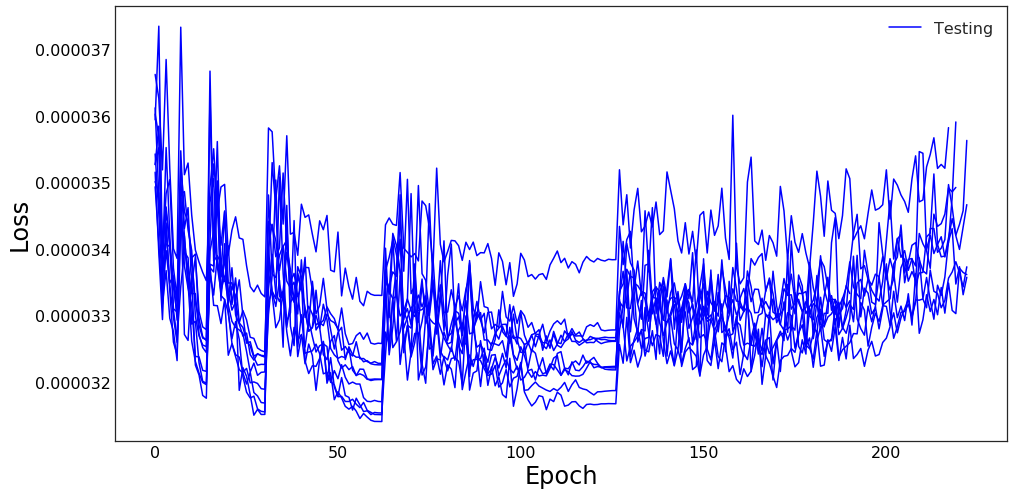

Mean wAUC = 0.0643 +- 0.0007
______________________________________



In [14]:
results, histories = batchTrainClassifier(trainData, nSplits, getModel, modelParams, trainParams, patience=160, cosAnnealMult=2, trainOnWeights=True, maxEpochs=maxEpochs, verbose=1)

## Construct ensemble

In [15]:
with open('train_weights/resultsFile.pkl', 'r') as fin:   
    results = pickle.load(fin)

In [16]:
ensemble, weights = assembleEnsemble(results, ensembleSize, ensembleMode, compileArgs)

Choosing ensemble by loss
Model 0 is 2 with loss = 3.140770892756951e-05
Model 1 is 6 with loss = 3.15027763804644e-05
Model 2 is 0 with loss = 3.151033694474221e-05
Model 3 is 1 with loss = 3.1705578350417954e-05
Model 4 is 8 with loss = 3.2023925511432475e-05
Model 5 is 4 with loss = 3.204070267631512e-05
Model 6 is 7 with loss = 3.225942918299284e-05
Model 7 is 5 with loss = 3.2281654851042646e-05
Model 8 is 3 with loss = 3.245494857906997e-05
Model 9 is 9 with loss = 3.314760386789267e-05


## Response on development data

In [17]:
batchEnsemblePredict(ensemble, weights, trainData, ensembleSize=10, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.000446025743871s per sample

Predicting batch 2 out of 10
Prediction took 0.000391783615832s per sample

Predicting batch 3 out of 10
Prediction took 0.000348845456077s per sample

Predicting batch 4 out of 10
Prediction took 0.000427408051491s per sample

Predicting batch 5 out of 10
Prediction took 0.000311918497086s per sample

Predicting batch 6 out of 10
Prediction took 0.000300882053375s per sample

Predicting batch 7 out of 10
Prediction took 0.000303689599037s per sample

Predicting batch 8 out of 10
Prediction took 0.000302958699475s per sample

Predicting batch 9 out of 10
Prediction took 0.00031183293965s per sample

Predicting batch 10 out of 10
Prediction took 0.000304966796916s per sample



In [18]:
print 'Training ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', trainData), getFeature('pred', trainData)),
                                                            roc_auc_score(getFeature('targets', trainData), getFeature('pred', trainData), sample_weight=getFeature('weights', trainData)))

Training ROC AUC: unweighted 0.903981263361, weighted 0.940169601207


## Response on val data

In [19]:
batchEnsemblePredict(ensemble, weights, valData, ensembleSize=10, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.000346916389465s per sample

Predicting batch 2 out of 10
Prediction took 0.000344546365738s per sample

Predicting batch 3 out of 10
Prediction took 0.000337427997589s per sample

Predicting batch 4 out of 10
Prediction took 0.000321021413803s per sample

Predicting batch 5 out of 10
Prediction took 0.000308602571487s per sample

Predicting batch 6 out of 10
Prediction took 0.000297875404358s per sample

Predicting batch 7 out of 10
Prediction took 0.000312607574463s per sample

Predicting batch 8 out of 10
Prediction took 0.000306513214111s per sample

Predicting batch 9 out of 10
Prediction took 0.000321220779419s per sample

Predicting batch 10 out of 10
Prediction took 0.000346382379532s per sample



In [20]:
print 'Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', valData), getFeature('pred', valData)),
                                                           roc_auc_score(getFeature('targets', valData), getFeature('pred', valData), sample_weight=getFeature('weights', valData)))

Testing ROC AUC: unweighted 0.901521168573, weighted 0.935042504574


## Evaluation

### Import in dataframe

In [21]:
valframe = convertToDF(valData)

50000 candidates loaded


In [22]:
sigVal = (valframe.gen_target == 1)
bkgVal = (valframe.gen_target == 0)

### MVA distributions

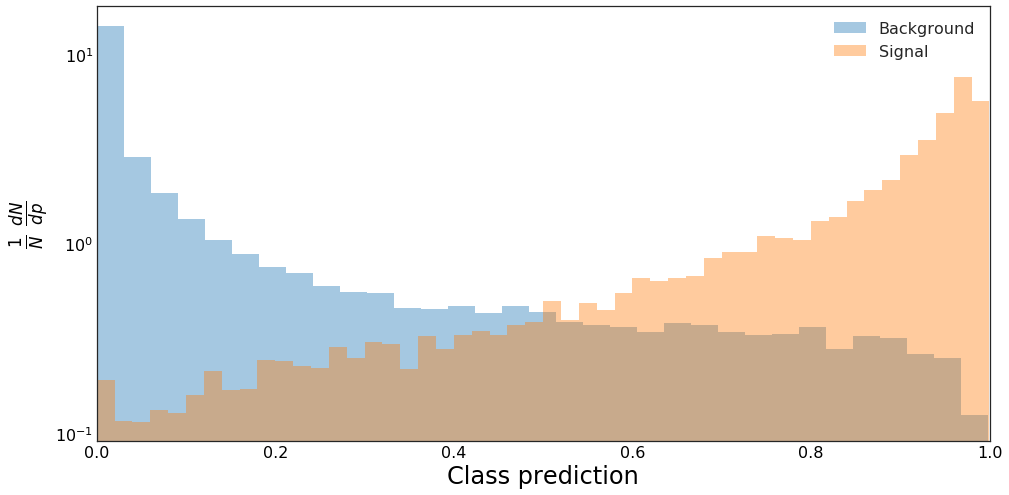

In [23]:
getClassPredPlot([valframe[bkgVal], valframe[sigVal]], weightName='gen_weight')

In [24]:
valframe['ams'] = amsScan(valframe)[0]

[0.9432380795478821, 1.698863426770334]


In [25]:
bests = foldAMSScan(valframe, 10)

[0.9870548844337463, 2.3624327052536103]
Fold 0, best AMS 2.36243270525 at cut of 0.987054884434. Total weights Signal:Bkg. 13.7316398621:8107.59814453


../Modules/Basics.py:63: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  np.sum(inData.iloc[test][inData.gen_target == 1]['gen_weight']),
../Modules/Basics.py:64: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  np.sum(inData.iloc[test][inData.gen_target == 0]['gen_weight']))


[0.9695965647697449, 2.410752919242296]
Fold 1, best AMS 2.41075291924 at cut of 0.96959656477. Total weights Signal:Bkg. 13.9063873291:8068.33105469
[0.9340733289718628, 1.728895124740677]
Fold 2, best AMS 1.72889512474 at cut of 0.934073328972. Total weights Signal:Bkg. 14.2512521744:8183.46191406
[0.9221197962760925, 1.7085321884985676]
Fold 3, best AMS 1.7085321885 at cut of 0.922119796276. Total weights Signal:Bkg. 13.8504085541:8280.39257812
[0.9438857436180115, 1.858886701202118]
Fold 4, best AMS 1.8588867012 at cut of 0.943885743618. Total weights Signal:Bkg. 13.7624378204:8130.05664062
[0.9818947911262512, 1.991581312676932]
Fold 5, best AMS 1.99158131268 at cut of 0.981894791126. Total weights Signal:Bkg. 14.1746768951:8204.93164062
[0.9839404821395874, 1.7999353513510765]
Fold 6, best AMS 1.79993535135 at cut of 0.98394048214. Total weights Signal:Bkg. 13.6754770279:8137.46826172
[0.9425048232078552, 1.672454216394043]
Fold 7, best AMS 1.67245421639 at cut of 0.942504823208.

In [28]:
print np.average([x[0] for x in bests], weights=[1/x[1] for x in bests])
print np.average([x[0] for x in bests], weights=[x[1] for x in bests])
print np.average([x[0] for x in bests], weights=[1.685564257934902-x[1] for x in bests])
print np.average([x[0] for x in bests], weights=[1/np.abs(1.685564257934902-x[1]) for x in bests])

0.9537325474608768
0.9581593926852172
0.9719974890164751
0.9391294788648147


In [26]:
scoreTest(ensemble, weights)

Predicting batch 1 out of 10
Prediction took 0.000253759908676s per sample

Predicting batch 2 out of 10
Prediction took 0.000336313741857s per sample

Predicting batch 3 out of 10
Prediction took 0.000390401215987s per sample

Predicting batch 4 out of 10
Prediction took 0.000241597236287s per sample

Predicting batch 5 out of 10
Prediction took 0.000281317602504s per sample

Predicting batch 6 out of 10
Prediction took 0.00046823870919s per sample

Predicting batch 7 out of 10
Prediction took 0.000334226599607s per sample

Predicting batch 8 out of 10
Prediction took 0.000316697289727s per sample

Predicting batch 9 out of 10
Prediction took 0.000246823796359s per sample

Predicting batch 10 out of 10
Prediction took 0.000288701638308s per sample



In [40]:
saveTest(0.95, 'Day_7')

../Data/Day_7_test.csv


In [41]:
!kaggle competitions submit -c higgs-boson -f ../Data/Day_7_test.csv -m"Day_7 last 95"

Successfully submitted to Higgs Boson Machine Learning Challenge